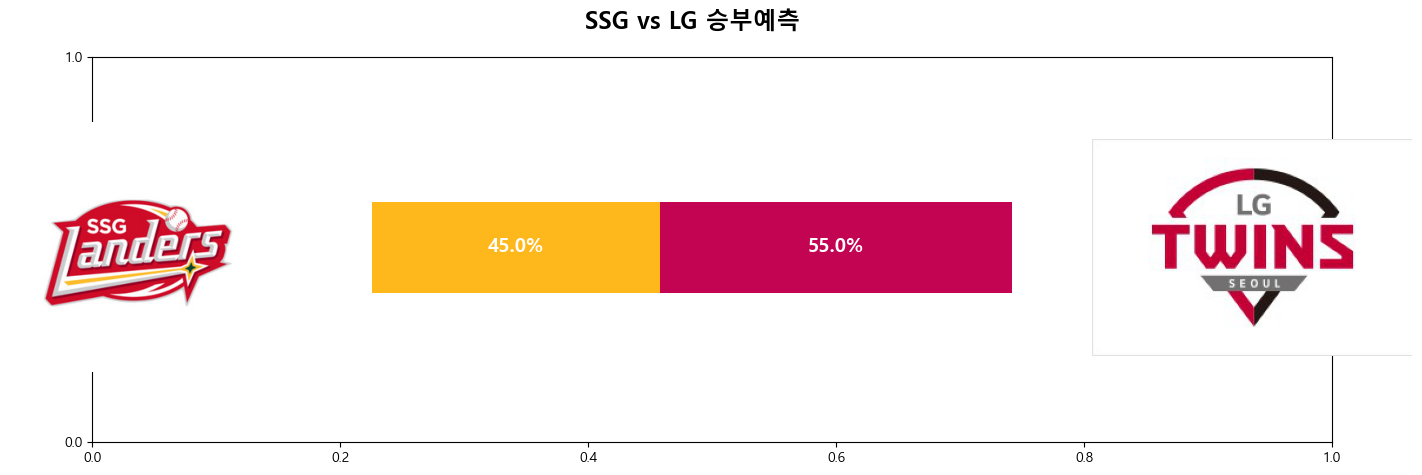

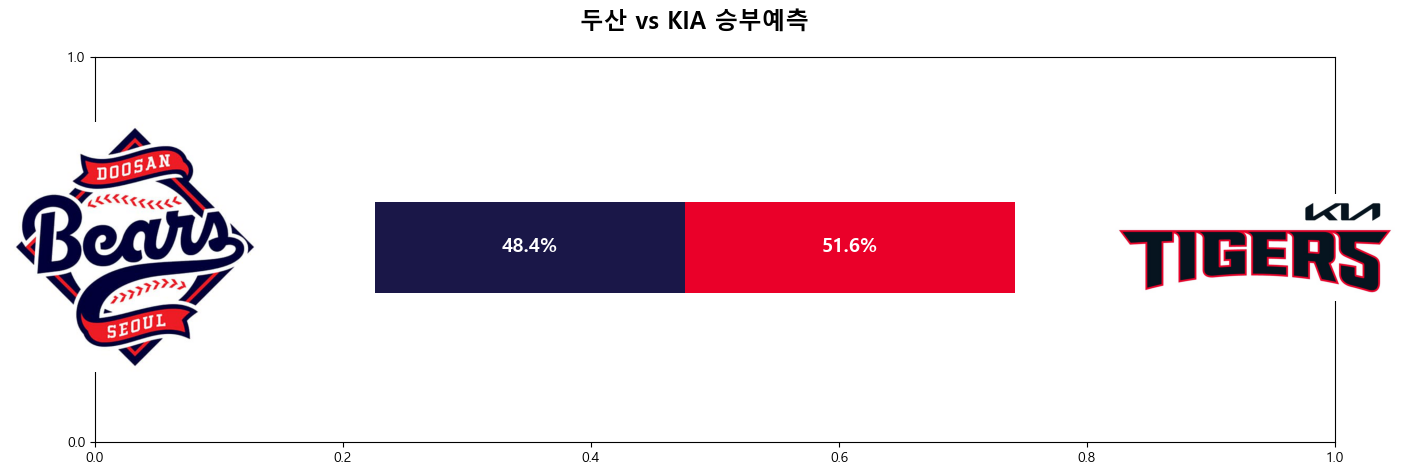

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.font_manager as fm
import pandas as pd

# 한글 폰트 설정
font_path = 'C:\\windows\\Fonts\\malgun.ttf'
font_prop = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font_prop)

# CSV 파일을 데이터프레임으로 읽기
odds_df = pd.read_csv('../../csv/oddsofwinning_ml.csv')

for index, row in odds_df.iterrows():
    home_team = row['home_team']
    away_team = row['away_team']
    home_winrate = row['home_winrate'] * 100
    away_winrate = row['away_winrate'] * 100

    # 이미지 경로 수정
    home_img = Image.open(f"../../jpg/{home_team}.jpg")
    away_img = Image.open(f"../../jpg/{away_team}.jpg")

    # 전체 그림
    fig = plt.figure(figsize=(16, 5))

    # 제목
    plt.text(0.5, 0.95, f"{home_team} vs {away_team} 승부예측", ha='center', va='center', fontsize=17, color='black', weight='bold', transform=fig.transFigure)

    # 왼쪽 이미지
    ax_img_home = fig.add_axes([0.05, 0.25, 0.2, 0.5])
    ax_img_home.imshow(home_img)
    ax_img_home.axis('off')

    # 오른쪽 이미지
    ax_img_away = fig.add_axes([0.75, 0.25, 0.2, 0.5])
    ax_img_away.imshow(away_img)
    ax_img_away.axis('off')

    # 중앙 그래프
    ax_bar = fig.add_axes([0.3, 0.4, 0.4, 0.2])


    # 팀별 색상 딕셔너리
    team_colors = {
        '키움': '#570514',
        '두산': '#1A1748',
        '롯데': '#041E42',
        '삼성': '#074CA1',
        '한화': '#FC4E00',
        'KIA': '#EA0029',
        'LG': '#C30452',
        'SSG': '#FFB81C',
        'NC': '#315288',
        'KT': '#EB1C24' 
    }

    # 중앙 그래프 색상 설정
    home_color = team_colors.get(home_team, '#1f77b4')  # 기본값: 진한 파랑
    away_color = team_colors.get(away_team, '#00cfff')  # 기본값: 밝은 하늘색

    ax_bar.barh(0, home_winrate, color=home_color, height=0.6)
    ax_bar.barh(0, away_winrate, left=home_winrate, color=away_color, height=0.6)

    # 승률 텍스트
    ax_bar.text(home_winrate / 2, 0, f"{home_winrate:.1f}%", va='center', ha='center', color='white', fontsize=14, weight='bold')
    ax_bar.text(home_winrate + away_winrate / 2, 0, f"{away_winrate:.1f}%", va='center', ha='center', color='white', fontsize=14, weight='bold')    

    # 축과 눈금 완전 제거
    ax_bar.axis('off')
    ax_bar.set_xticks([])
    ax_bar.set_yticks([])
    for spine in ax_bar.spines.values():
        spine.set_visible(False)

    ax_bar.set_xlim(0, 100)

    plt.show()
